In [51]:
!pip install fbprophet

## Librerias

In [52]:
import time
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import io, base64, os, json, re, glob
import datetime
from datetime import timedelta
import pandas as pd
import pydata_google_auth
import numpy as np

from pandas.plotting import scatter_matrix
sns.set()

from fbprophet import Prophet
import statsmodels.api as sm

## Cargando Datos

In [53]:
path = '/content/drive/My Drive/'
#file = 'SCADA_data_WT2339.csv'
file = 'WT2651.csv'
df_raw = pd.read_csv(path+file,
                   low_memory=False)
df_raw['date_time'] = pd.to_datetime(df_raw['date_time'], format="%Y/%m/%d %H:%M:%S")
df_raw = df_raw.sort_values(by='date_time')
df_raw.tail()

,id,date_time,ld_id,wtc_CurTime_endvalue,wtc_SecAnemo_min,wtc_SecAnemo_max,wtc_SecAnemo_mean,wtc_SecAnemo_stddev,wtc_YawPos_min,wtc_YawPos_max,wtc_YawPos_mean,wtc_YawPos_stddev,wtc_GenRpm_min,wtc_GenRpm_max,wtc_GenRpm_mean,wtc_GenRpm_stddev,wtc_HubLubGr_min,wtc_HubLubGr_max,wtc_HubLubGr_mean,wtc_HubLubGr_stddev,wtc_IceDetec_min,wtc_IceDetec_max,wtc_IceDetec_mean,wtc_IceDetec_stddev,wtc_IMidBa_min,wtc_IMidBa_max,wtc_IMidBa_mean,wtc_IMidBa_stddev,wtc_IMidCa_min,wtc_IMidCa_max,wtc_IMidCa_mean,wtc_IMidCa_stddev,wtc_IMidAa_min,wtc_IMidAa_max,wtc_IMidAa_mean,wtc_IMidAa_stddev,wtc_MainSRpm_min,wtc_MainSRpm_max,wtc_MainSRpm_mean,wtc_MainSRpm_stddev,...,wtc_HydOilTm_max,wtc_HydOilTm_mean,wtc_HydOilTm_stddev,wtc_GFilB1Tm_min,wtc_GFilB1Tm_max,wtc_GFilB1Tm_mean,wtc_GFilB1Tm_stddev,wtc_GFilB2Tm_min,wtc_GFilB2Tm_max,wtc_GFilB2Tm_mean,wtc_GFilB2Tm_stddev,wtc_GFilB3Tm_min,wtc_GFilB3Tm_max,wtc_GFilB3Tm_mean,wtc_GFilB3Tm_stddev,wtc_ReacUTmp_min,wtc_ReacUTmp_max,wtc_ReacUTmp_mean,wtc_ReacUTmp_stddev,wtc_ReacVTmp_min,wtc_ReacVTmp_max,wtc_ReacVTmp_mean,wtc_ReacVTmp_stddev,wtc_ReacWTmp_min,wtc_ReacWTmp_max,wtc_ReacWTmp_mean,wtc_ReacWTmp_stddev,wtc_MainBTmp_min,wtc_MainBTmp_max,wtc_MainBTmp_mean,wtc_MainBTmp_stddev,wtc_MBearHTm_min,wtc_MBearHTm_max,wtc_MBearHTm_mean,wtc_MBearHTm_stddev,wtc_MBearGTm_min,wtc_MBearGTm_max,wtc_MBearGTm_mean,wtc_MBearGTm_stddev,Availability
341507,6411046,2020-06-30 23:30:00,2651,NaN,8.52,11.76,10.15770,0.510885,230.5,233.3,232.801,1.042270,1207.4,1236.1,1223.57,4.21006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.3,13.7,13.5059,0.062333,...,36.0,35.4256,0.541293,32.0,32.0,32.0,0.0,35.0,35.0,35.0000,0.000000,31.0,31.0,31.0000,0.000000,45.0,46.0,45.0013,0.035333,42.0,43.0,42.0774,0.267146,44.0,45.0,44.1470,0.354122,42.0,42.0,42.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
341508,6411047,2020-06-30 23:40:00,2651,NaN,8.14,11.37,9.81251,0.523051,228.4,230.6,229.508,1.081090,1208.7,1240.0,1223.78,4.52574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.3,13.7,13.5061,0.065571,...,35.0,34.2367,0.548831,32.0,32.0,32.0,0.0,35.0,35.0,35.0000,0.000000,31.0,31.0,31.0000,0.000000,44.0,45.0,44.2740,0.446009,41.0,42.0,41.4521,0.497697,43.0,44.0,43.4618,0.498541,42.0,42.0,42.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
341509,6411048,2020-06-30 23:50:00,2651,NaN,8.22,11.62,9.91485,0.582830,228.4,231.4,229.543,1.390700,1209.2,1244.6,1223.90,5.44548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.3,13.8,13.5082,0.072819,...,36.0,35.1747,0.792627,32.0,32.0,32.0,0.0,35.0,35.0,35.0000,0.000000,30.0,31.0,30.9935,0.080462,43.0,44.0,43.2555,0.436161,40.0,41.0,40.9356,0.245405,42.0,43.0,42.6268,0.483659,42.0,42.0,42.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
341510,6411049,2020-07-01 00:00:00,2651,NaN,8.18,11.70,9.91995,0.569975,229.1,229.3,229.118,0.056759,1207.4,1239.6,1223.84,5.17378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.3,13.7,13.5081,0.069335,...,35.0,33.4031,0.556364,32.0,32.0,32.0,0.0,35.0,35.0,35.0000,0.000000,30.0,31.0,30.7622,0.425736,42.0,43.0,42.8698,0.336523,40.0,41.0,40.1408,0.347781,42.0,42.0,42.0000,0.000000,42.0,42.0,42.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
341511,6411050,2020-07-01 00:10:00,2651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36.0,35.4496,0.543070,32.0,32.0,32.0,0.0,34.0,35.0,34.9964,0.059892,30.0,31.0,30.1416,0.348674,42.0,43.0,42.0114,0.106237,39.0,41.0,39.9635,0.199630,41.0,42.0,41.6182,0.485824,42.0,42.0,42.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [54]:
df_raw.head()

,id,date_time,ld_id,wtc_CurTime_endvalue,wtc_SecAnemo_min,wtc_SecAnemo_max,wtc_SecAnemo_mean,wtc_SecAnemo_stddev,wtc_YawPos_min,wtc_YawPos_max,wtc_YawPos_mean,wtc_YawPos_stddev,wtc_GenRpm_min,wtc_GenRpm_max,wtc_GenRpm_mean,wtc_GenRpm_stddev,wtc_HubLubGr_min,wtc_HubLubGr_max,wtc_HubLubGr_mean,wtc_HubLubGr_stddev,wtc_IceDetec_min,wtc_IceDetec_max,wtc_IceDetec_mean,wtc_IceDetec_stddev,wtc_IMidBa_min,wtc_IMidBa_max,wtc_IMidBa_mean,wtc_IMidBa_stddev,wtc_IMidCa_min,wtc_IMidCa_max,wtc_IMidCa_mean,wtc_IMidCa_stddev,wtc_IMidAa_min,wtc_IMidAa_max,wtc_IMidAa_mean,wtc_IMidAa_stddev,wtc_MainSRpm_min,wtc_MainSRpm_max,wtc_MainSRpm_mean,wtc_MainSRpm_stddev,...,wtc_HydOilTm_max,wtc_HydOilTm_mean,wtc_HydOilTm_stddev,wtc_GFilB1Tm_min,wtc_GFilB1Tm_max,wtc_GFilB1Tm_mean,wtc_GFilB1Tm_stddev,wtc_GFilB2Tm_min,wtc_GFilB2Tm_max,wtc_GFilB2Tm_mean,wtc_GFilB2Tm_stddev,wtc_GFilB3Tm_min,wtc_GFilB3Tm_max,wtc_GFilB3Tm_mean,wtc_GFilB3Tm_stddev,wtc_ReacUTmp_min,wtc_ReacUTmp_max,wtc_ReacUTmp_mean,wtc_ReacUTmp_stddev,wtc_ReacVTmp_min,wtc_ReacVTmp_max,wtc_ReacVTmp_mean,wtc_ReacVTmp_stddev,wtc_ReacWTmp_min,wtc_ReacWTmp_max,wtc_ReacWTmp_mean,wtc_ReacWTmp_stddev,wtc_MainBTmp_min,wtc_MainBTmp_max,wtc_MainBTmp_mean,wtc_MainBTmp_stddev,wtc_MBearHTm_min,wtc_MBearHTm_max,wtc_MBearHTm_mean,wtc_MBearHTm_stddev,wtc_MBearGTm_min,wtc_MBearGTm_max,wtc_MBearGTm_mean,wtc_MBearGTm_stddev,Availability
0,9,2014-01-01 01:00:00,2651,NaN,5.4,12.2,9.41721,1.025250,153.3,154.7,154.306,0.540855,1339.9,1455.0,1401.19,21.3289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8,16.1,15.4656,0.237916,...,36.0,35.9983,0.040994,14.0,15.0,14.4426,0.496694,17.0,18.0,17.1114,0.314647,12.0,15.0,13.1477,0.464851,35.0,35.0,35.0000,0.000000,31.0,32.0,31.0210,0.143440,33.0,34.0,33.0046,0.067300,30.0,31.0,30.9622,0.190672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,27,2014-01-01 01:10:00,2651,NaN,6.2,13.3,9.49587,0.931010,154.6,154.7,154.677,0.041886,1331.9,1452.8,1399.88,22.2596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.7,16.0,15.4504,0.247826,...,36.0,36.0000,0.000000,14.0,15.0,14.8412,0.365505,17.0,18.0,17.1717,0.377105,13.0,15.0,13.2436,0.559971,35.0,36.0,35.5498,0.497512,31.0,32.0,31.8564,0.350633,33.0,34.0,33.5916,0.491538,31.0,31.0,31.0000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,45,2014-01-01 01:20:00,2651,NaN,5.2,11.4,8.38823,0.979634,154.0,154.7,154.588,0.179326,1308.2,1456.4,1398.40,22.8181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,16.1,15.4339,0.253645,...,36.0,36.0000,0.000000,14.0,15.0,14.8278,0.377598,17.0,18.0,17.3120,0.463310,12.0,15.0,13.4333,0.704072,33.0,36.0,34.4148,0.759217,29.0,32.0,30.4583,0.750420,31.0,34.0,32.6086,0.654023,30.0,31.0,30.9983,0.040791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,63,2014-01-01 01:30:00,2651,NaN,5.6,11.4,8.41187,1.021770,153.5,155.5,154.359,0.537492,1322.9,1456.0,1395.82,27.8060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.6,16.1,15.4063,0.308209,...,36.0,36.0000,0.000000,14.0,15.0,14.5686,0.495272,17.0,18.0,17.2090,0.406618,12.0,15.0,13.2969,0.609347,31.0,33.0,32.2833,0.542238,28.0,29.0,28.4342,0.495654,30.0,32.0,30.5255,0.536423,30.0,31.0,30.9984,0.040382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,81,2014-01-01 01:40:00,2651,NaN,5.2,12.1,8.08126,1.072990,153.7,156.2,154.385,0.742201,1283.7,1458.2,1393.29,27.5062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.1,16.1,15.3778,0.305125,...,36.0,36.0000,0.000000,14.0,15.0,14.0303,0.171503,16.0,18.0,16.6553,0.482844,12.0,14.0,12.4595,0.650357,29.0,32.0,30.4199,0.622219,26.0,28.0,26.9177,0.694412,28.0,30.0,28.7553,0.659353,30.0,31.0,30.9983,0.040994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [55]:
print(list(df_raw.columns))

['id', 'date_time', 'ld_id', 'wtc_CurTime_endvalue', 'wtc_SecAnemo_min', 'wtc_SecAnemo_max', 'wtc_SecAnemo_mean', 'wtc_SecAnemo_stddev', 'wtc_YawPos_min', 'wtc_YawPos_max', 'wtc_YawPos_mean', 'wtc_YawPos_stddev', 'wtc_GenRpm_min', 'wtc_GenRpm_max', 'wtc_GenRpm_mean', 'wtc_GenRpm_stddev', 'wtc_HubLubGr_min', 'wtc_HubLubGr_max', 'wtc_HubLubGr_mean', 'wtc_HubLubGr_stddev', 'wtc_IceDetec_min', 'wtc_IceDetec_max', 'wtc_IceDetec_mean', 'wtc_IceDetec_stddev', 'wtc_IMidBa_min', 'wtc_IMidBa_max', 'wtc_IMidBa_mean', 'wtc_IMidBa_stddev', 'wtc_IMidCa_min', 'wtc_IMidCa_max', 'wtc_IMidCa_mean', 'wtc_IMidCa_stddev', 'wtc_IMidAa_min', 'wtc_IMidAa_max', 'wtc_IMidAa_mean', 'wtc_IMidAa_stddev', 'wtc_MainSRpm_min', 'wtc_MainSRpm_max', 'wtc_MainSRpm_mean', 'wtc_MainSRpm_stddev', 'wtc_PitchRef_min', 'wtc_PitchRef_max', 'wtc_PitchRef_mean', 'wtc_PitchRef_stddev', 'wtc_PitchRef_BladeA_min', 'wtc_PitchRef_BladeA_max', 'wtc_PitchRef_BladeA_mean', 'wtc_PitchRef_BladeA_stddev', 'wtc_PitchRef_BladeB_min', 'wtc_Pit

## Graficas
### Temperatura Eje Lento

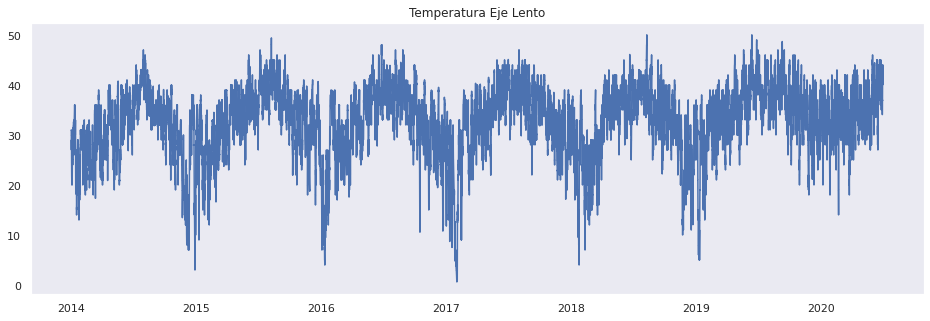

In [56]:
plt.subplots(1, figsize = (16, 5))
plt.grid()
plt.title('Temperatura Eje Lento')
#plt.plot(df_raw['TempEjeLento_1'].rolling(window=150).median())
plt.plot(df_raw['date_time'],df_raw['wtc_MainBTmp_mean'])
plt.show()

### Variables Exógenas

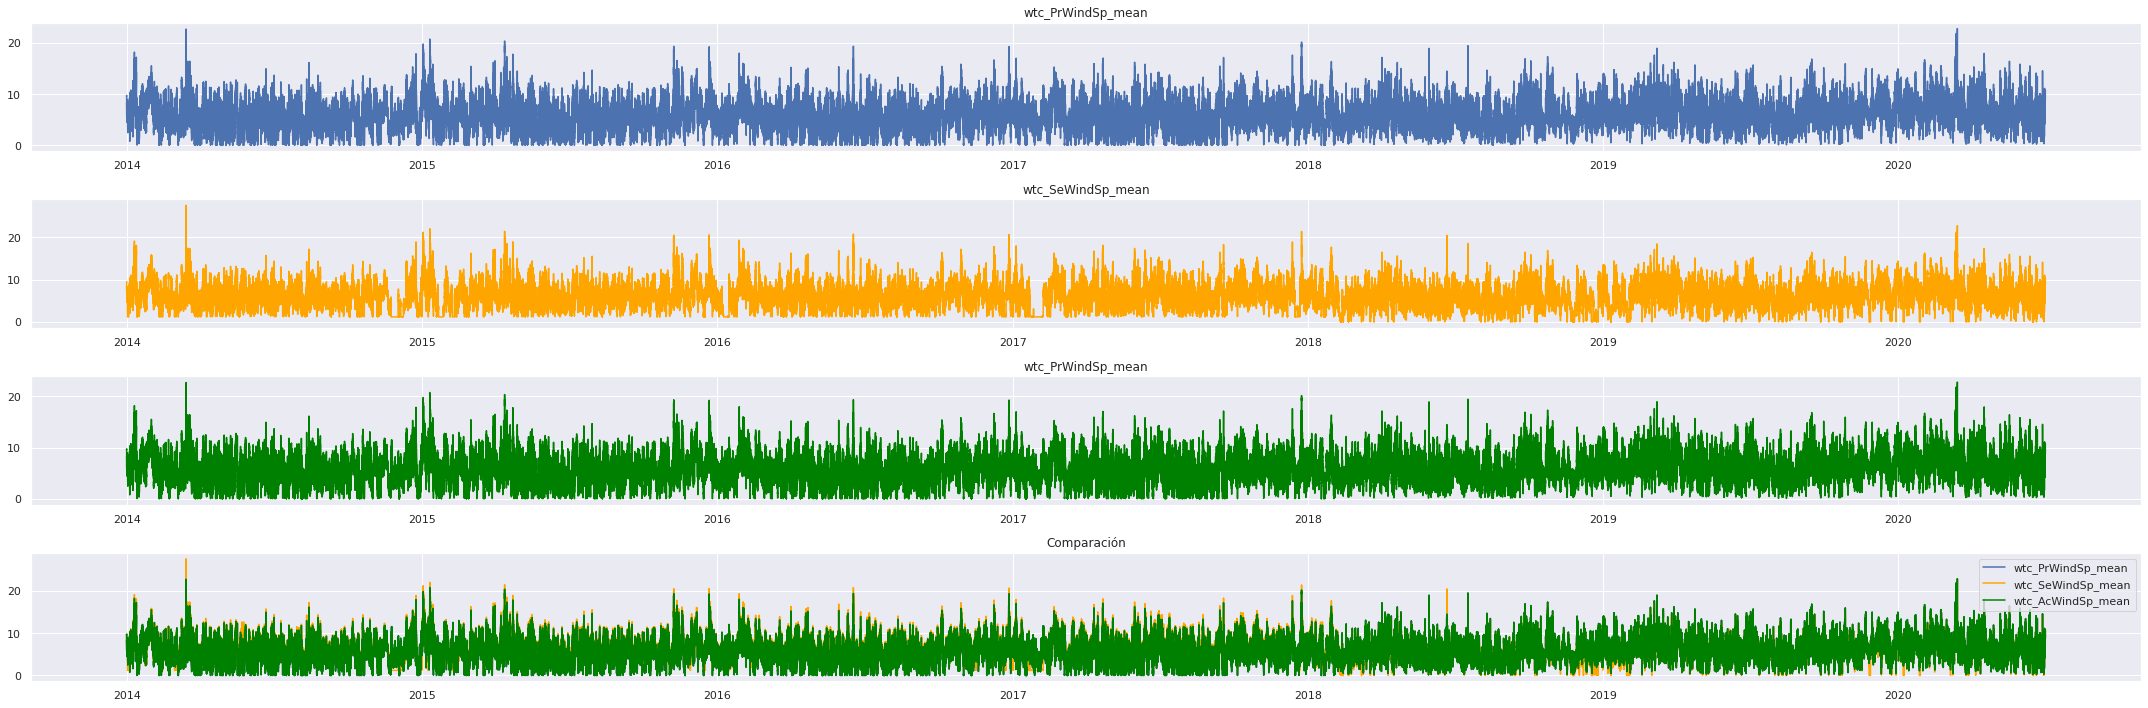

In [57]:
df_exogenas = df_raw[['wtc_PrWindSp_mean','wtc_SeWindSp_mean','wtc_AcWindSp_mean']]
plt.figure(figsize=(30,10))

plt.subplot(411)
plt.title('wtc_PrWindSp_mean')
plt.plot(df_raw['date_time'],df_exogenas.wtc_PrWindSp_mean)

plt.subplot(412)
plt.title('wtc_SeWindSp_mean')
plt.plot(df_raw['date_time'],df_exogenas.wtc_SeWindSp_mean,color='orange')

plt.subplot(413)
plt.title('wtc_PrWindSp_mean')
plt.plot(df_raw['date_time'],df_exogenas.wtc_PrWindSp_mean,color='green')


plt.subplot(414)
plt.title('Comparación')
plt.plot(df_raw['date_time'],df_exogenas.wtc_PrWindSp_mean,label='wtc_PrWindSp_mean')
plt.plot(df_raw['date_time'],df_exogenas.wtc_SeWindSp_mean,color='orange',label='wtc_SeWindSp_mean')
plt.plot(df_raw['date_time'],df_exogenas.wtc_PrWindSp_mean,color='green',label='wtc_AcWindSp_mean')
plt.legend()
plt.tight_layout()
plt.show()

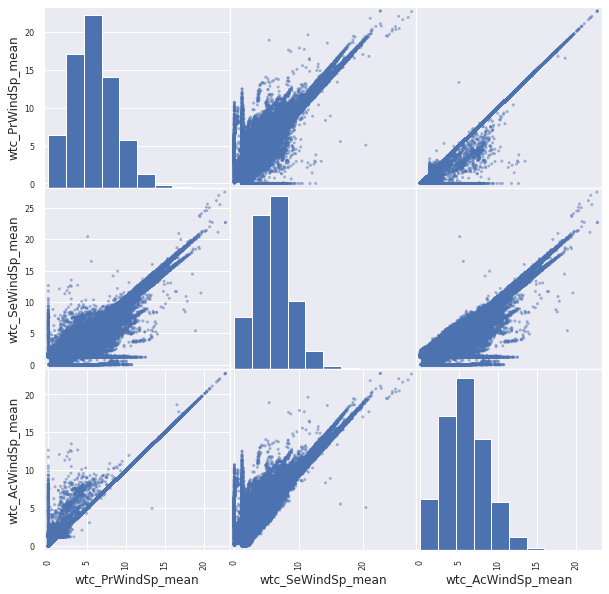

In [58]:
SM = scatter_matrix(df_exogenas,figsize=(10,10))

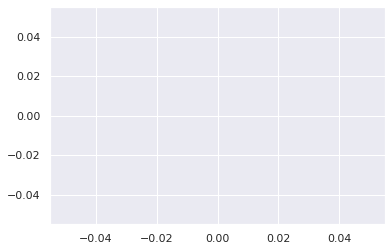

In [59]:
df_raw['wtc_TetAnemo_mean'].plot()

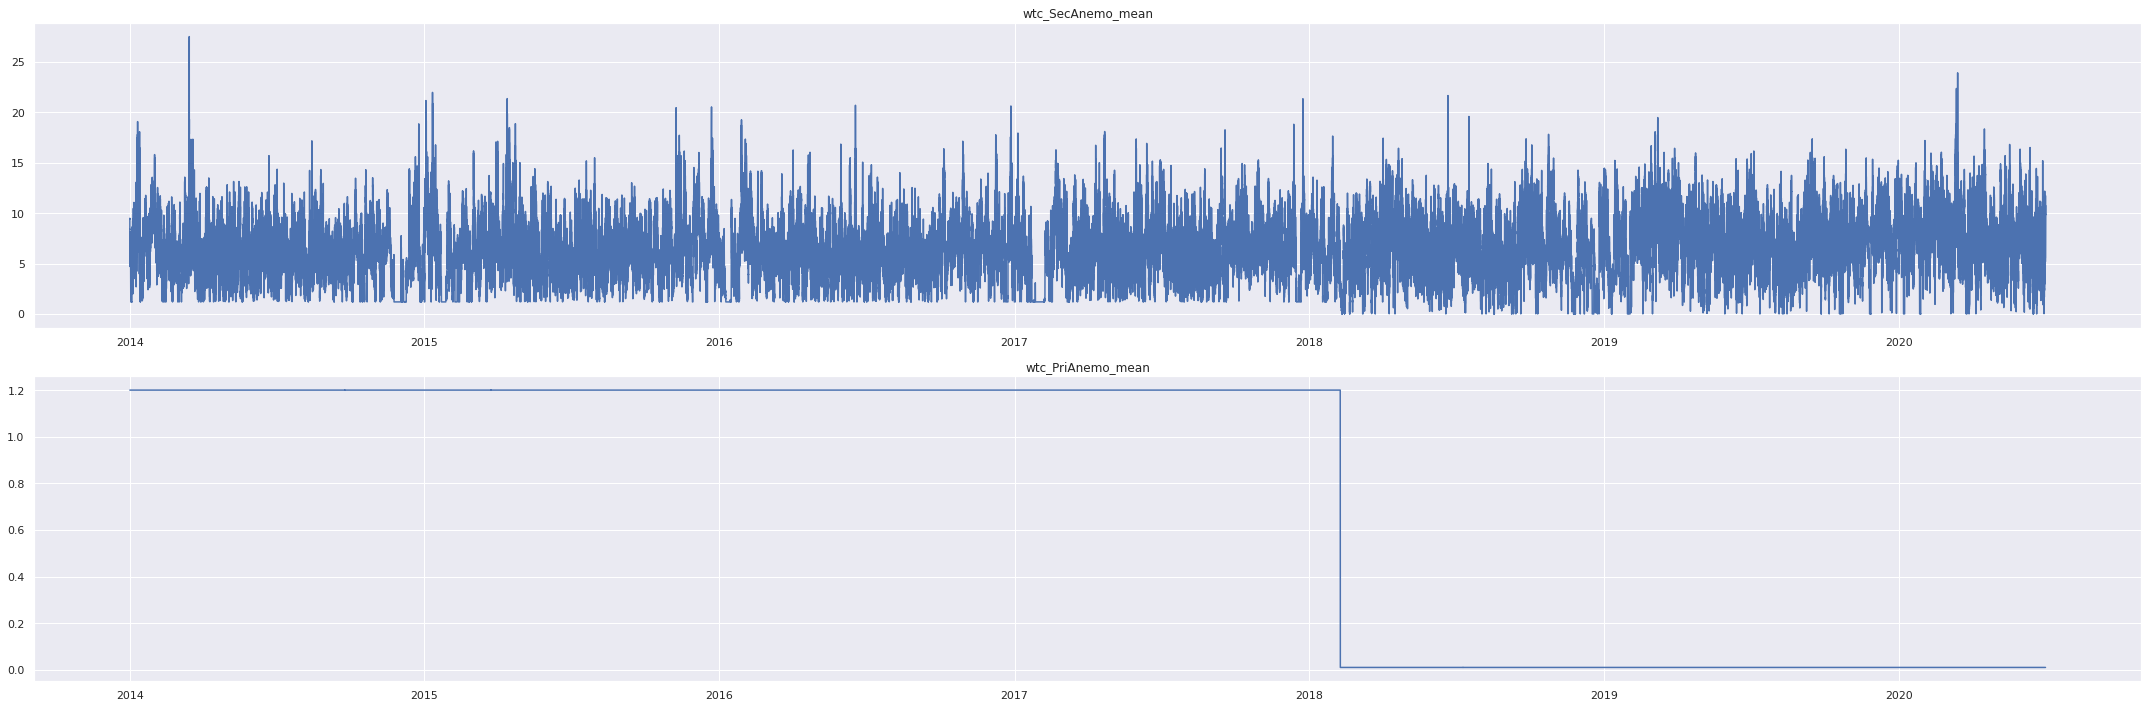

In [60]:
df_exogenas2 = df_raw[['wtc_SecAnemo_mean','wtc_PriAnemo_mean']]
plt.figure(figsize=(30,10))

plt.subplot(211)
plt.title('wtc_SecAnemo_mean')
plt.plot(df_raw['date_time'],df_exogenas2.wtc_SecAnemo_mean)

plt.subplot(212)
plt.title('wtc_PriAnemo_mean')
plt.plot(df_raw['date_time'],df_exogenas2.wtc_PriAnemo_mean)

plt.tight_layout()
plt.show()

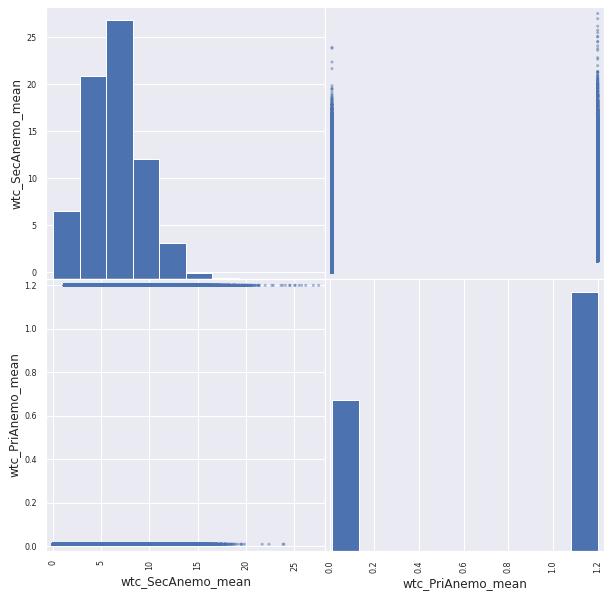

In [61]:
SM = scatter_matrix(df_exogenas2,figsize=(10,10))

### Variables de temperatura

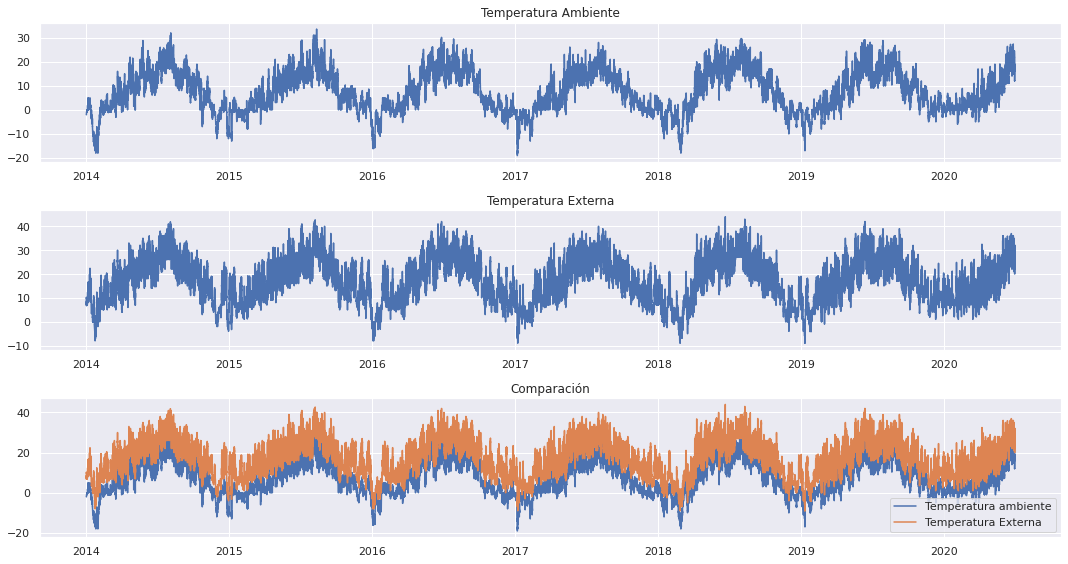

In [62]:
df_temp = df_raw[['wtc_AmbieTmp_mean','wtc_A1ExtTmp_mean']]
plt.figure(figsize=(15,8))
plt.subplot(311)
plt.plot(df_raw.date_time,df_temp.wtc_AmbieTmp_mean,label="Temperatura ambiente")
plt.title('Temperatura Ambiente')
plt.subplot(312)
plt.plot(df_raw.date_time,df_temp.wtc_A1ExtTmp_mean,label="Temperatura Externa")
plt.title('Temperatura Externa')
plt.subplot(313)
plt.plot(df_raw.date_time,df_temp.wtc_AmbieTmp_mean,label="Temperatura ambiente")
plt.plot(df_raw.date_time,df_temp.wtc_A1ExtTmp_mean,label="Temperatura Externa")
plt.title('Comparación')
plt.legend()
plt.tight_layout()
plt.show()

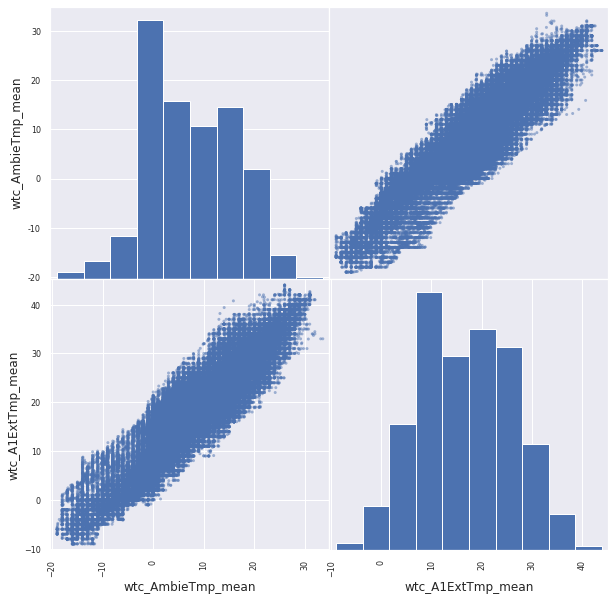

In [63]:
SM = scatter_matrix(df_temp,figsize=(10,10))

## Creando Modelo

In [64]:
train_dataset = df_raw[['date_time','wtc_MainBTmp_mean','wtc_PrWindSp_mean','wtc_AmbieTmp_mean']]
train_dataset.columns = ['ds', 'y','wtc_PrWindSp_mean','wtc_AmbieTmp_mean']
train_dataset=train_dataset.dropna()
train_dataset.head()

,ds,y,wtc_PrWindSp_mean,wtc_AmbieTmp_mean
0,2014-01-01 01:00:00,30.9622,9.54415,-2.0
1,2014-01-01 01:10:00,31.0000,9.73992,-2.0
2,2014-01-01 01:20:00,30.9983,8.24707,-2.0
3,2014-01-01 01:30:00,30.9984,8.45258,-2.0
4,2014-01-01 01:40:00,30.9983,7.95057,-2.0


In [65]:
print('Total de muestras en el tiempo: ',train_dataset.shape[0])

Total de muestras en el tiempo:  341501


In [66]:
date = '2017-12-11'
date_fail = '2019-12-12'
data_sano = train_dataset[(train_dataset['ds'] < date)]

In [67]:
data_prefallo = train_dataset[(train_dataset['ds'] > date)]
data_prefallo = data_prefallo[(data_prefallo['ds']<date_fail)]

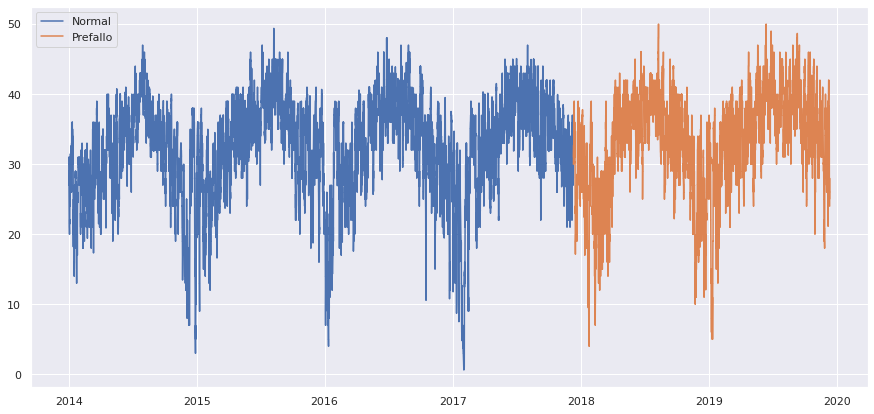

In [68]:
plt.figure(figsize=(15,7))
plt.plot(data_sano['ds'],data_sano['y'],label='Normal')
plt.plot(data_prefallo['ds'],data_prefallo['y'],label='Prefallo')
plt.legend()
plt.show()

### Modelo Prophet

In [69]:
prophet_basic = Prophet(yearly_seasonality=True)
#prophet_basic = Prophet()
prophet_basic.add_regressor('wtc_PrWindSp_mean')
prophet_basic.add_regressor('wtc_AmbieTmp_mean')
prophet_basic.fit(data_sano)

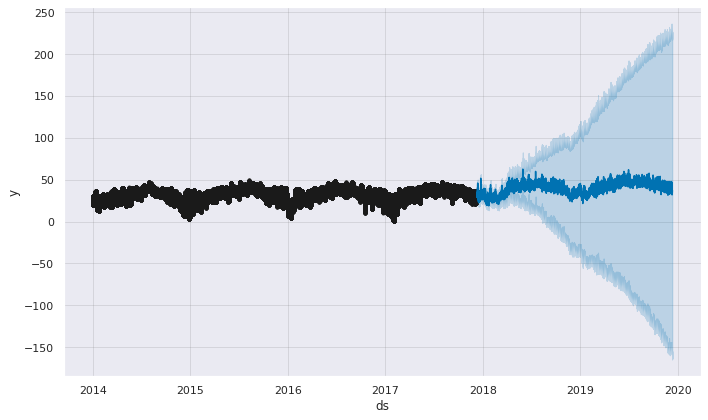

In [70]:
forecast=prophet_basic.predict(data_prefallo.drop(columns="y"))
fig1 =prophet_basic.plot(forecast)

In [ ]:
fig1 = prophet_basic.plot_components(forecast)

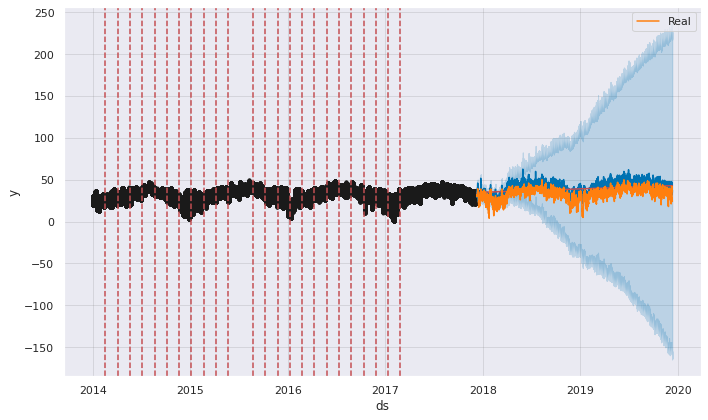

In [72]:
from fbprophet.plot import add_changepoints_to_plot
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)
plt.plot(data_prefallo['ds'],data_prefallo['y'],'tab:orange',label='Real')
plt.legend()

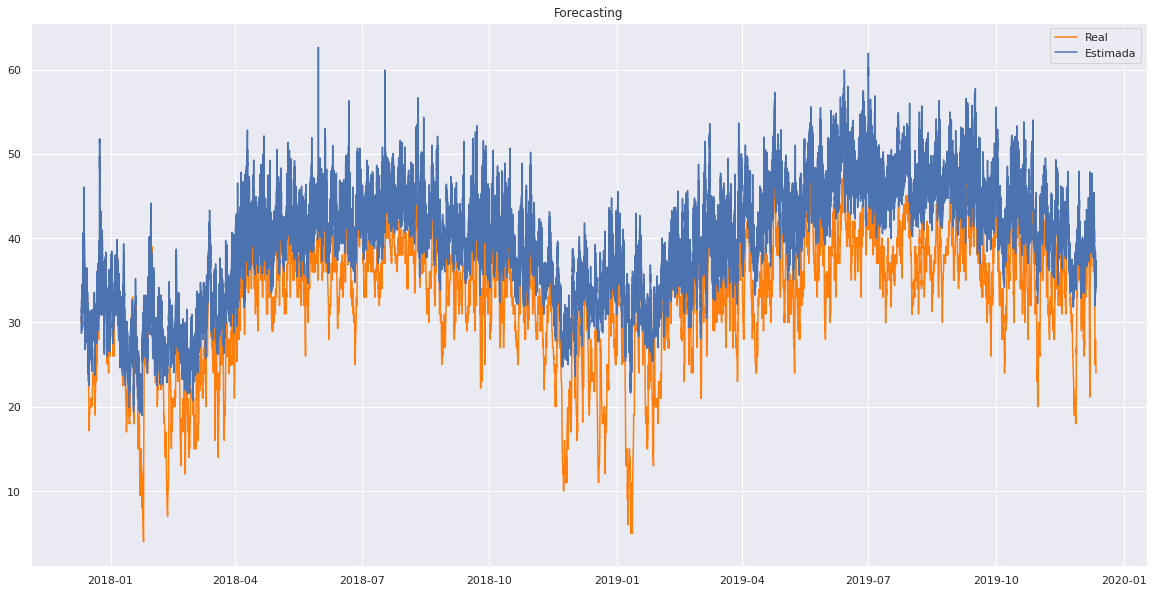

In [73]:
plt.figure(figsize=(20,10))
#plt.plot(forecast['ds'],forecast['yhat_lower'],'-r',label='Confianza')
#plt.plot(forecast['ds'],forecast['yhat_upper'],'-r')
plt.plot(data_prefallo['ds'],data_prefallo['y'],'tab:orange',label='Real')
plt.plot(forecast['ds'],forecast['yhat'],'b',label='Estimada')
#plt.plot(data_1['ds'],data_1['y'],'c')
plt.legend()
plt.title('Forecasting')
plt.show()

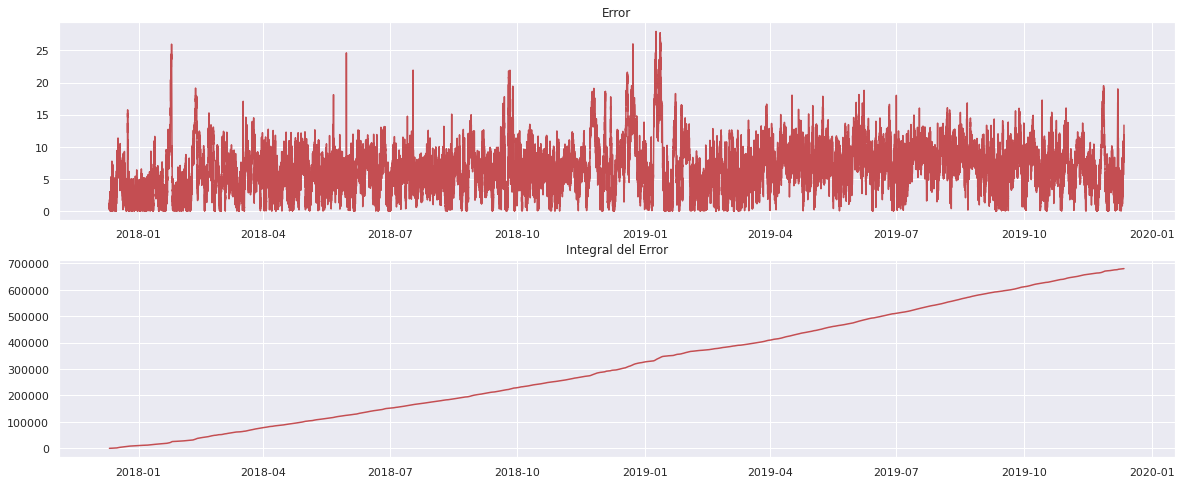

In [74]:
import numpy as np
forecast['error']= data_prefallo['y']-forecast['yhat']
forecast['y_true'] = data_prefallo['y'].values
forecast['error'] = forecast['y_true']-forecast['yhat']

plt.figure(figsize=(20,8))
plt.subplot(211)
plt.title('Error')
plt.plot(forecast['ds'],forecast['error'].abs(),'r')
plt.subplot(212)
plt.title('Integral del Error')
plt.plot(forecast['ds'],forecast['error'].abs().cumsum(),'r')
plt.show()

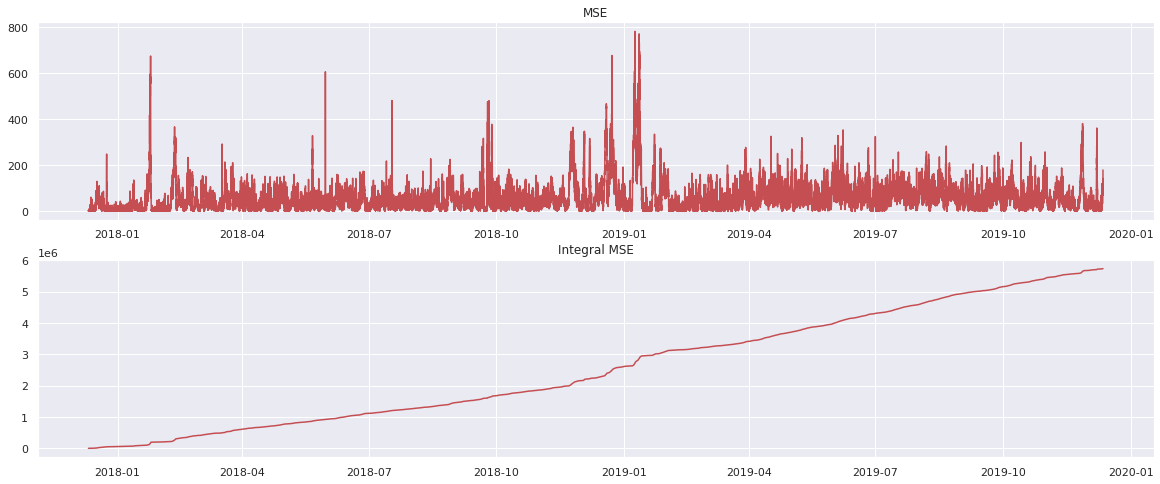

In [75]:
signal = forecast['error']**2
plt.figure(figsize=(20,8))
plt.subplot(211)
plt.plot(forecast['ds'],signal,'r')
plt.title('MSE')
plt.subplot(212)
signal=forecast['error']**2
plt.plot(forecast['ds'],signal.cumsum(),'r')
plt.title('Integral MSE')
plt.show()